In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [40]:
data=pd.read_csv("/content/IMDb Movies India.csv",encoding='latin-1')

In [41]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [43]:
data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [44]:
data.Rating.unique()

array([ nan,  7. ,  4.4,  4.7,  7.4,  5.6,  4. ,  6.2,  5.9,  6.5,  5.7,
        6.3,  7.2,  6.6,  7.3,  7.1,  6.9,  3.5,  5. ,  4.5,  6.4,  4.1,
        4.8,  8.1,  5.5,  6.8,  6.1,  7.7,  5.1,  7.6,  3.1,  3.3,  7.8,
        8.4,  5.2,  4.3,  5.8,  4.6,  7.5,  6.7,  3.6,  3.9,  5.4,  4.2,
        5.3,  3.4,  3. ,  8. ,  6. ,  3.8,  7.9,  2.7,  4.9,  2.4,  3.7,
        3.2,  2.5,  2.8,  2.6,  2.9,  8.2,  8.7,  8.3,  9.3,  8.8,  2.1,
        2.3,  8.5,  8.6,  9. ,  9.6,  1.7,  9.1,  2. ,  1.4,  8.9,  1.9,
        9.4,  9.7,  1.8,  9.2,  1.6, 10. ,  2.2,  1.1])

In [45]:
data["Director"].value_counts()

Jayant Desai        58
Kanti Shah          57
Babubhai Mistry     50
Mahesh Bhatt        48
Master Bhagwan      47
                    ..
Naeem Siddiqui       1
Shadaab Khan         1
Mystelle Brabbee     1
Kunal Shivdasani     1
Kiran Thej           1
Name: Director, Length: 5938, dtype: int64

In [46]:
data.Duration.unique()

array([nan, '109 min', '90 min', '110 min', '105 min', '147 min',
       '142 min', '59 min', '82 min', '116 min', '96 min', '120 min',
       '161 min', '166 min', '102 min', '87 min', '132 min', '66 min',
       '146 min', '112 min', '168 min', '158 min', '126 min', '94 min',
       '138 min', '124 min', '144 min', '157 min', '136 min', '107 min',
       '113 min', '80 min', '122 min', '149 min', '148 min', '130 min',
       '121 min', '188 min', '115 min', '103 min', '114 min', '170 min',
       '100 min', '99 min', '140 min', '128 min', '93 min', '125 min',
       '145 min', '75 min', '111 min', '134 min', '85 min', '104 min',
       '92 min', '137 min', '127 min', '150 min', '119 min', '135 min',
       '86 min', '76 min', '70 min', '72 min', '151 min', '95 min',
       '52 min', '89 min', '143 min', '177 min', '117 min', '123 min',
       '154 min', '88 min', '175 min', '153 min', '78 min', '139 min',
       '133 min', '101 min', '180 min', '60 min', '46 min', '164 min',
       '

In [47]:
data.Year.unique()

array([nan, '(2019)', '(2021)', '(2010)', '(1997)', '(2005)', '(2008)',
       '(2012)', '(2014)', '(2004)', '(2016)', '(1991)', '(1990)',
       '(2018)', '(1987)', '(1948)', '(1958)', '(2017)', '(2020)',
       '(2009)', '(2002)', '(1993)', '(1946)', '(1994)', '(2007)',
       '(2013)', '(2003)', '(1998)', '(1979)', '(1951)', '(1956)',
       '(1974)', '(2015)', '(2006)', '(1981)', '(1985)', '(2011)',
       '(2001)', '(1967)', '(1988)', '(1995)', '(1959)', '(1996)',
       '(1970)', '(1976)', '(2000)', '(1999)', '(1973)', '(1968)',
       '(1943)', '(1953)', '(1986)', '(1983)', '(1989)', '(1982)',
       '(1977)', '(1957)', '(1950)', '(1992)', '(1969)', '(1975)',
       '(1947)', '(1972)', '(1971)', '(1935)', '(1978)', '(1960)',
       '(1944)', '(1963)', '(1940)', '(1984)', '(1934)', '(1955)',
       '(1936)', '(1980)', '(1966)', '(1949)', '(1962)', '(1964)',
       '(1952)', '(1933)', '(1942)', '(1939)', '(1954)', '(1945)',
       '(1961)', '(1965)', '(1938)', '(1941)', '(1931)', 

In [48]:
data.groupby(['Genre']).count()

,Name,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
Genre,,,,,,,,,
Action,1289,1265,262,417,417,1249,1207,1124,1005
"Action, Adventure",41,41,17,24,24,41,40,39,39
"Action, Adventure, Biography",1,1,1,1,1,1,1,1,1
"Action, Adventure, Comedy",42,41,37,40,40,42,42,42,42
"Action, Adventure, Crime",19,19,11,16,16,19,19,19,19
...,...,...,...,...,...,...,...,...,...
"Thriller, Action",2,2,1,1,1,2,2,2,2
"Thriller, Musical, Mystery",1,1,1,1,1,1,1,1,1
"Thriller, Mystery",3,3,2,3,3,3,3,3,3


In [49]:
data.isnull()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,False,True,True,False,True,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
15504,False,False,True,False,False,False,False,False,False,False
15505,False,False,False,False,False,False,False,False,False,False
15506,False,False,True,False,True,True,False,False,True,True
15507,False,False,True,False,True,True,True,True,True,True


In [50]:
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [51]:
data['Duration']=data['Duration'].str.replace('min', '').apply(pd.to_numeric)
data["Votes"]=data["Votes"].replace("$5.16M", 516)
data["Votes"]=pd.to_numeric(data['Votes'].str.replace(',', ''))

In [52]:
data['Year'] = data['Year'].str.extract('(\d+)').astype(float)

In [53]:
data.dropna(subset=['Year'], inplace=True)
data.dropna(subset=['Genre'], inplace=True)

In [54]:
data['Rating'].fillna(data['Rating'].mode().max(), inplace=True)
data['Duration'].fillna(data['Duration'].mean(), inplace=True)
data['Votes'].fillna(data['Votes'].mean(), inplace=True)
data.dropna(subset=['Director','Actor 1','Actor 2','Actor 3','Genre'], inplace=True)

In [55]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8.000000,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021.0,90.0,"Drama, Musical",6.2,1963.643981,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35.000000,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010.0,105.0,Drama,6.2,1963.643981,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,1997.0,147.0,"Comedy, Drama, Musical",4.7,827.000000,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


In [56]:
data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [57]:
data.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

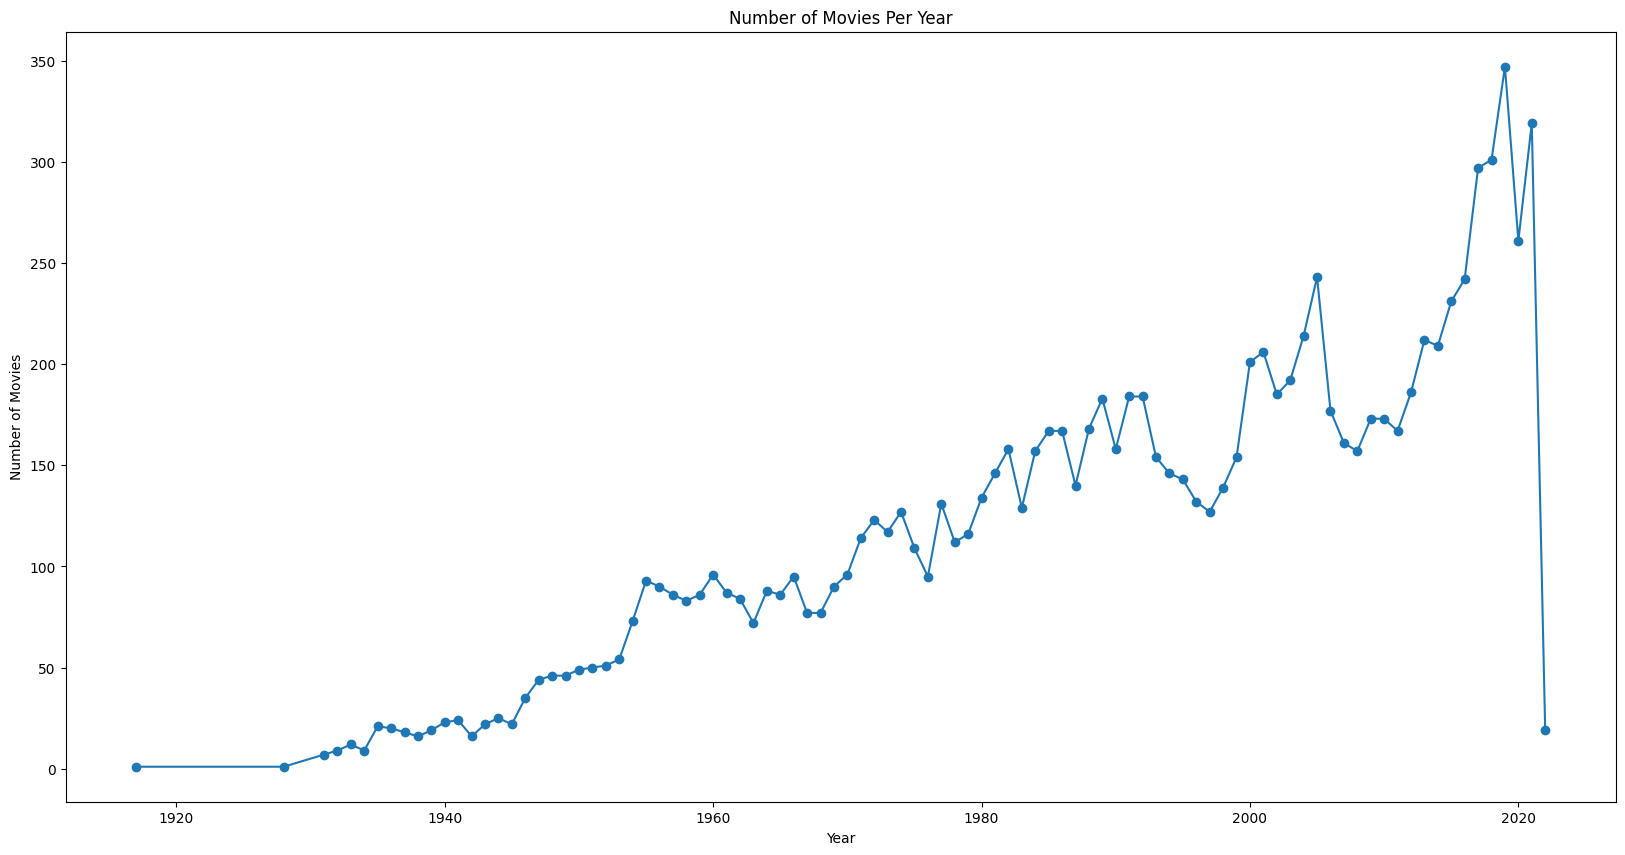

In [58]:
plt.figure(figsize=(20, 10))
year_counts = data['Year'].value_counts().sort_index()
years = year_counts.index
plt.plot(years, year_counts, marker='o')
plt.title('Number of Movies Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

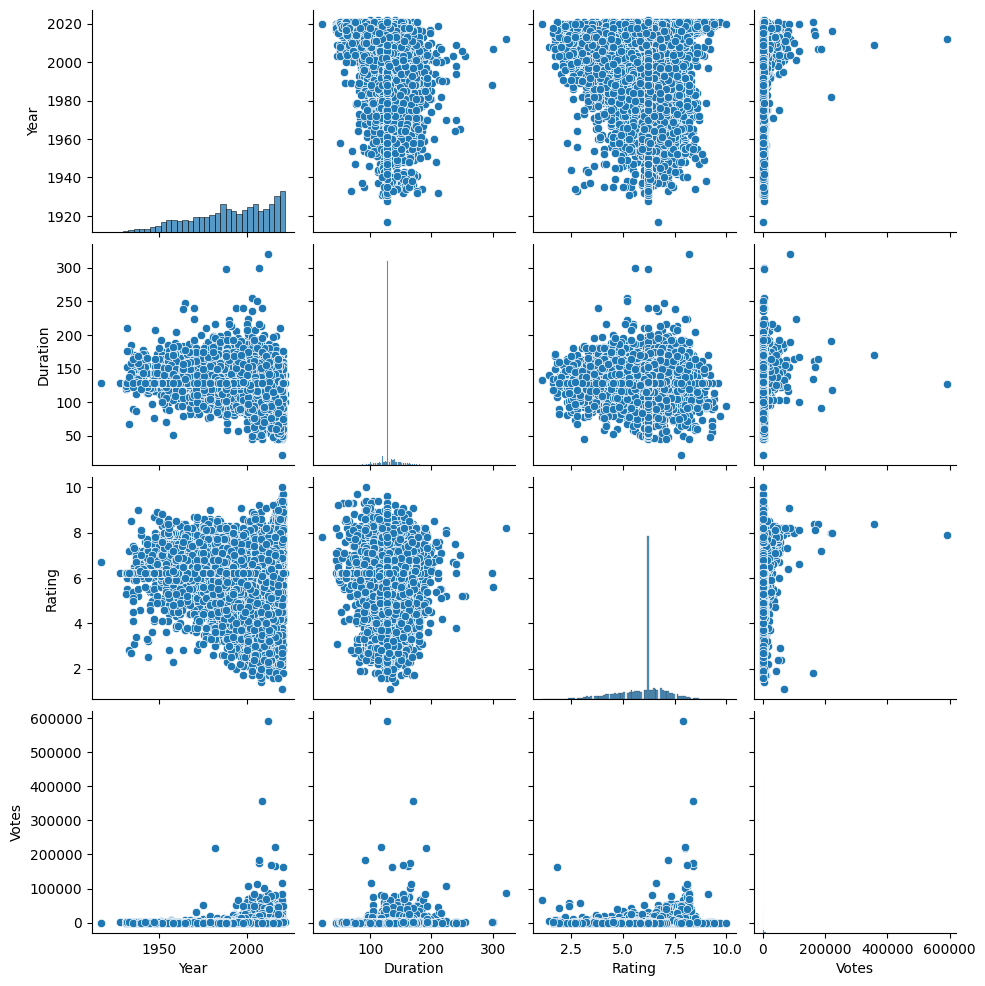

In [59]:
sns.pairplot(data)
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data[numeric_columns].corr(method='spearman')

In [60]:
def Talents(column):
    global data
    data[column].value_counts().sort_values(ascending=False)[:10].plot(kind="bar", figsize=(20,6), edgecolor="k")
    plt.xticks(rotation=0)
    plt.title("Top Ten {}".format(column))
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

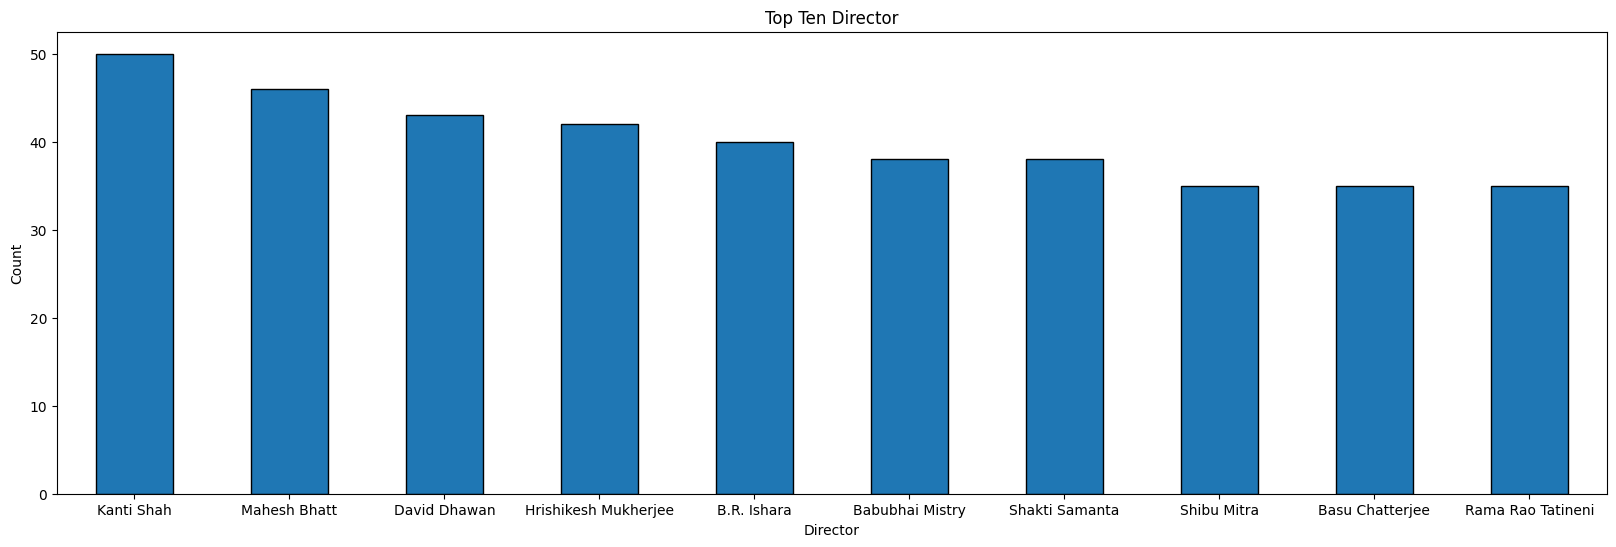

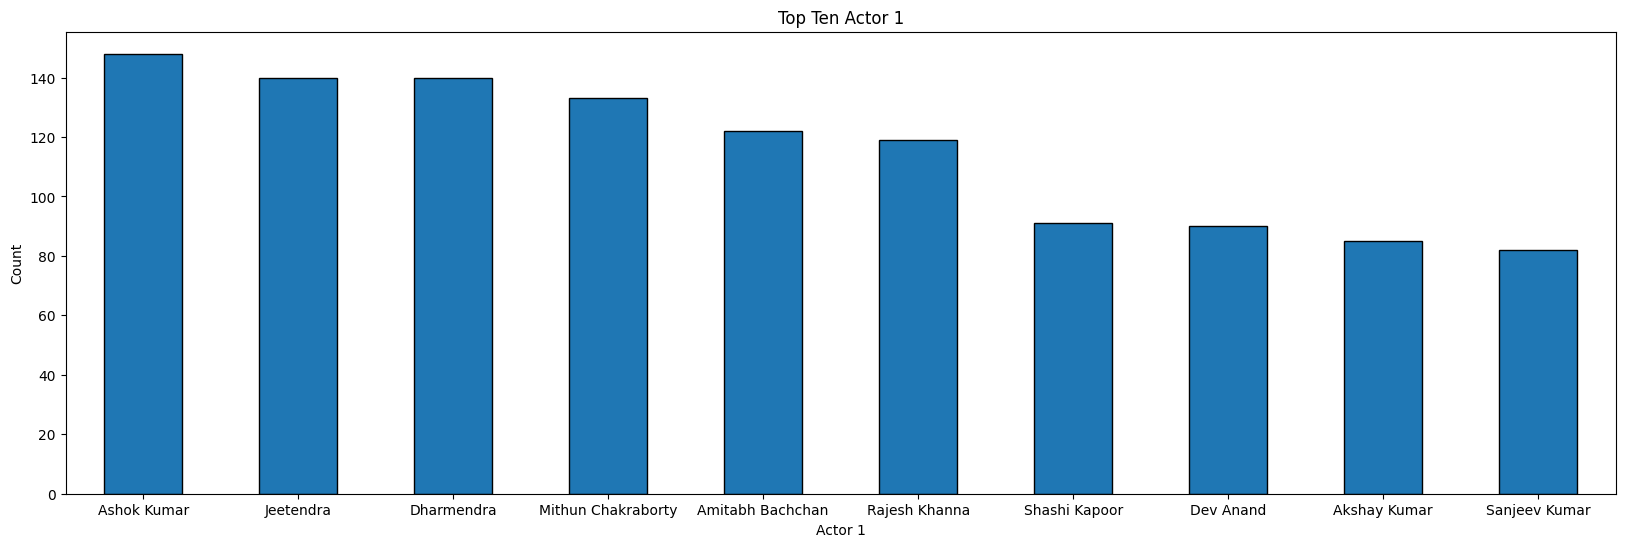

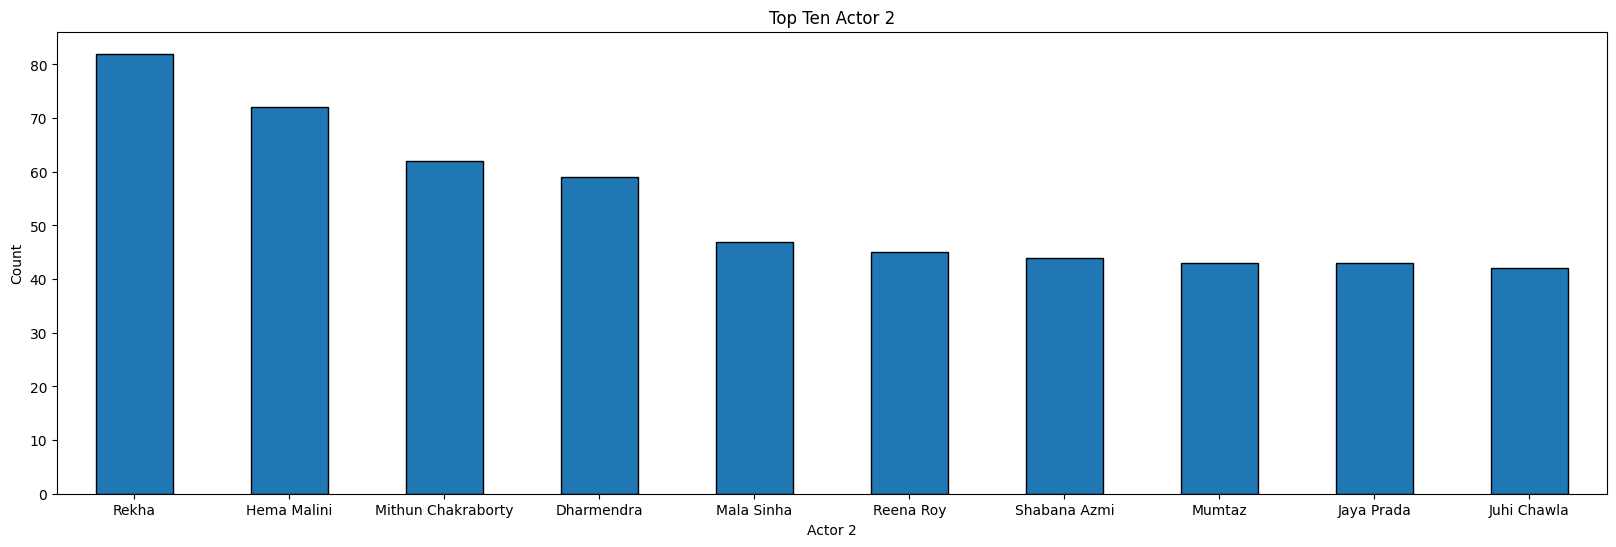

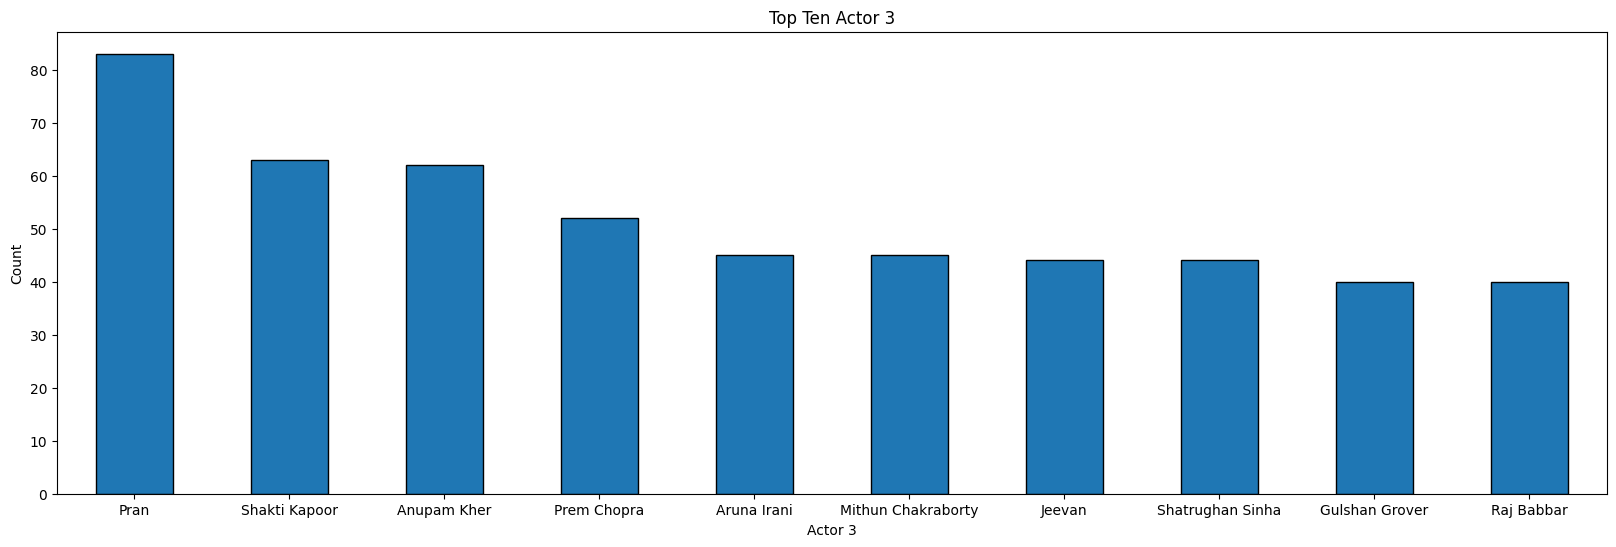

In [61]:
Talents("Director")
Talents("Actor 1")
Talents("Actor 2")
Talents("Actor 3")

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [63]:
data.dropna(subset=['Rating','Duration','Year'],inplace=True)
data.reset_index(drop=True,inplace=True)

In [64]:
X=data.drop(['Name','Rating'],axis=1)
y=data['Rating']

In [65]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [66]:
X_train.shape

(8868, 8)

In [67]:
X_test.shape

(2218, 8)

In [68]:
y_train.shape

(8868,)

In [69]:
y_test.shape

(2218,)

In [70]:
numeric_features = ['Duration', 'Year']
categorical_features = ['Genre']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [71]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [72]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest Regressor': RandomForestRegressor(random_state=42)
}

In [73]:
for name, model in models.items():
    regressor = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

In [74]:
for name, model in models.items():
    regressor = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R-squared: {r2:.4f}")

Model: Linear Regression
Mean Squared Error: 1.2246
R-squared: 0.0731
Model: Ridge Regression
Mean Squared Error: 1.2075
R-squared: 0.0861
Model: Lasso Regression
Mean Squared Error: 1.3217
R-squared: -0.0003
Model: Random Forest Regressor
Mean Squared Error: 1.2564
R-squared: 0.0491
